In [13]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Import the relevant modules
import numpy as np
import figs.utilities.config_helper as ch
import figs.utilities.transform_helper as th
import sousvide.visualize.plot_3D as p3d

from figs.tsplines.min_time_snap import MinTimeSnap

In [18]:
def get_ideal_times(courses:list[str]|str):

    # Ensure that the courses are in a list
    if isinstance(courses,str):
        courses = [courses]

    # Loop through the courses and get the ideal times
    for course in courses:
        config = ch.get_config(course,"courses")
        mts = MinTimeSnap(config["waypoints"],20,10)

        Ts,FO = mts.get_desired_trajectory()
        vel_stats = mts.get_velocity_statistics()
        Tp = np.hstack([0.0,np.cumsum(mts.dTd)])
        WPs = mts.FOkf[:,0:3,0]

        tXU = th.TsFO_to_tXU(Ts,FO,1.0,7.0,None)
        
        # Print the results
        print("="*80)
        print(f"Course: {course}")
        print("Trajectory Time Points  :",np.around(Tp,3))
        print("Vel Stats (mean/std/max):",np.around(vel_stats,3))

        # Plot the trajectory
        p3d.tXU_to_3D([tXU],WPs=WPs)

Course: circuit
Trajectory Time Points  : [ 0.     0.839  3.506  3.998  5.584  6.064  9.025  9.521 10.692 12.344]
Vel Stats (mean/std/max): [1.439 0.597 2.384]


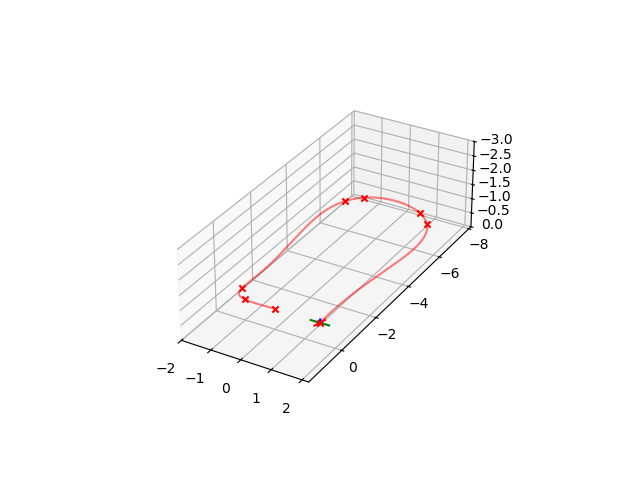

In [20]:
# List of courses to get the ideal times for
courses = [
    # "crescent",
    # "infinity",
    # "line_clean",
    # "traverse",
    # "spiral",
    "circuit",
    # "hover"
]

# Get the ideal times for the courses
get_ideal_times(courses)